___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://http2.mlstatic.com/D_NQ_NP_2X_960089-MLM26807621582_022018-F.webp" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Selección de Variables</font>

La selección de variables es un proceso donde automáticamente se seleccionan aquellos atributos en nuestros datos que contribuyen más a la variable a predecir. 

Las variables irrelevantes o parcialmente relevantes pueden afectar negativamente el rendimiento del modelo.

Beneficios:
- Reducir sobreajuste: menos datos irrelevantes significan menos oportunidades de tomar decisiones basadas en ruido = mejor performance. 
- Modelo más fácil de entender
- Reduce el tiempo de entrenamiento: menos datos significa que el modelo se entrena más rápido


**Tipos de algoritmos de selección de variables**

    - **Métodos de envoltura (wrapper)**: se considera como un problema de búsqueda la selección de un conjunto de variables donde diferentes combinaciones se preparan, evalúan y comparan con otras combinaciones. Se utiliza un modelo predictivo para evaluar una combinación de características y asignar un score basado en la precisión del modelo. 
        - Ejemplo: RFE

    - **Métodos de filtrado**: estos métodos aplican una medida estadística para asignar una puntuación a cada característica. Las características se clasifican según la puntuación y se seleccionan para conservarlas o eliminarlas del conjunto de datos. Los métodos suelen ser univariados y consideran la característica de forma independiente o con respecto a la variable dependiente.
        - Ejemplo: prueba de chi cuadrada, L-Anova, método de correlación, criterio de la varianza

    - **Métodos embebidos (intrinsecos)**: mientras se va creando el modelo el método aprende qué características contribuyen mejor a la precisión. El método más común es el de regularización. 
        - Ejemplo: LASSO, Elastic Net, Ridge, Trees


<img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png" width="550" height="480" align="center"/>


**Mencionando algunas técnicas más comunes:**

- Porcentaje de valores nulos
- Cantidad de variación
- Correlación por parejas
- Mulicolinealidad
- PCA
- Correlación con la variable a predecir (target)
- Forward Selection
- Backward Selection
- Stepwise Selection
- LASSO
- Selección basada en árboles

**¿Cómo elegir las mejores variables?**
No es una respuesta fácil, hay que tratar de varias formas.

# Datos: Cáncer de mama
Los datos se pueden encontrar en:
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Se busca clasificar qué si un tumor es maligno (1) o benigno (0). 

Se tiene información de 30 variables


In [1]:
from rich.jupyter import display
#Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
#cargar datos
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
df = pd.concat([X,y], axis=1)

In [3]:
#vistazo datos
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
#estadistica de los datos
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


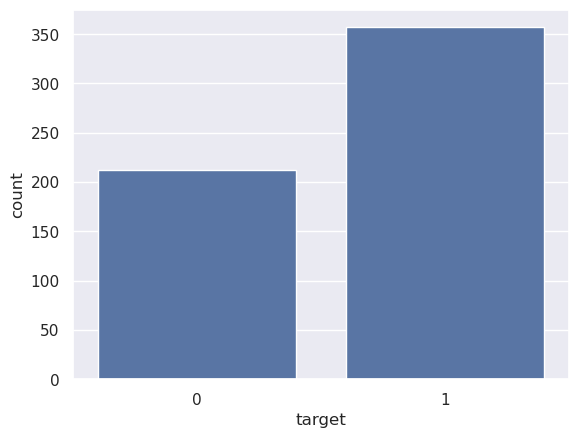

In [5]:
# observamos la variable de salida
sns.set(style="darkgrid")
ax = sns.countplot(x = y)

In [23]:
df.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

**¿Qué tipos de datos tenemos aquí?** 

Las variables de entrada (independientes) son: continuas

La variable de salida (dependiente) es: categorica


# <font color= #2E9AFE> Paso 1</font>

**Comienzamos por comprender el negocio**

- Hablar con los expertos en la materia

- Comprende qué características deberían ser importantes según el problema

- Elimina las variables obvias sin sentido (p. ej., identificadores, variables sin valor)


# <font color= #2E9AFE> Paso 2</font>

**Limpieza previa a los datos (solo si es necesario)**


In [6]:
#Escalamiento --> SOLO A LAS VARIABLES DE ENTRADA
x_scaled = X
x_scaled =  (x_scaled - x_scaled.mean())/(x_scaled.std())
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,0


# <font color= #2E9AFE> Paso 3 Visualización y Cuestionamiento</font>

La visualizacion nos ayuda a darnos una idea de qué variables podrían ayudar o no al modelo

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
1,0,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
2,0,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,0,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
4,0,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956
...,...,...,...,...,...,...,...,...,...,...,...
564,0,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209
565,0,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681
566,0,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800
567,0,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778


,target,features,value
0,0,mean radius,1.096100
1,0,mean radius,1.828212
2,0,mean radius,1.578499
3,0,mean radius,-0.768233
4,0,mean radius,1.748758
...,...,...,...
5685,0,mean fractal dimension,-0.930209
5686,0,mean fractal dimension,-1.057681
5687,0,mean fractal dimension,-0.894800
5688,0,mean fractal dimension,1.042778


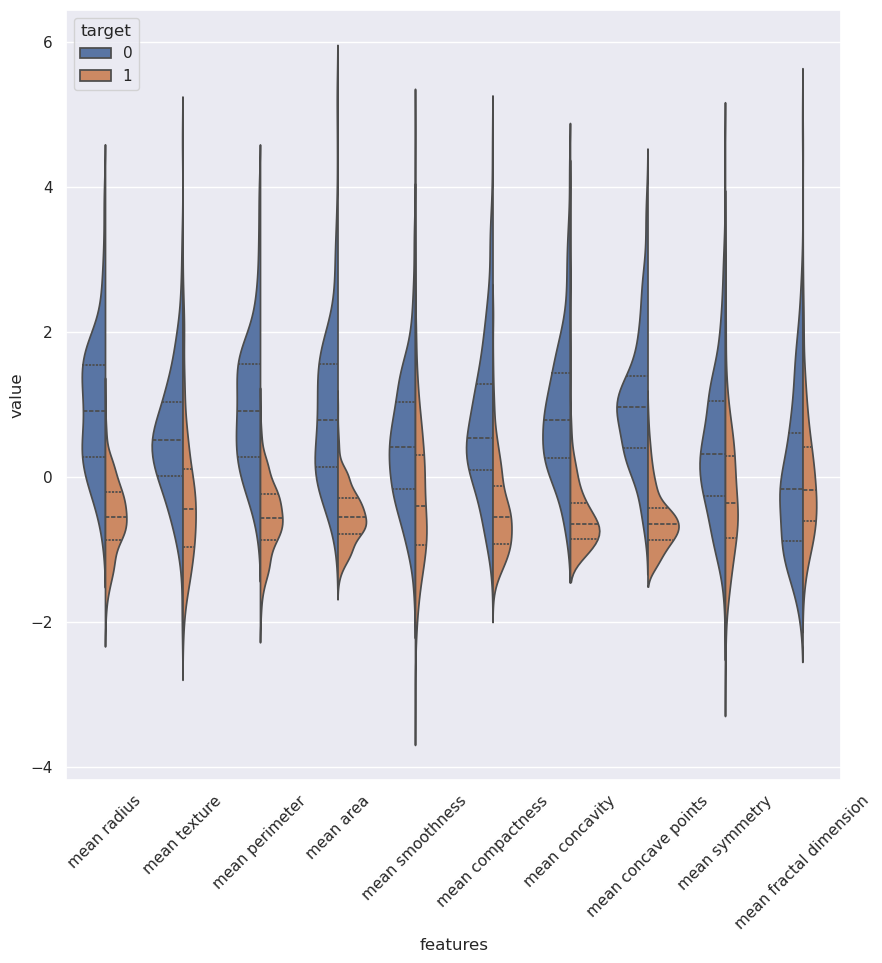

In [26]:
def violin_plot(beginning,end):
    data = pd.concat([y,x_scaled.iloc[:,beginning:end]],axis=1)
    display(data)
    data = pd.melt(data, id_vars="target", var_name="features", value_name='value')
    display(data)
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="target", data=data, split=True, inner="quart")
    plt.xticks(rotation=45)

violin_plot(0,10)

mean radius, mean perimeter, mean area, compactness mean, mean concavity, mean concave points están bien separados entre tumores malignos y benignos. Estas 6 características serían buenas candidatas para el modelo.

Por el contrario, mean fractal dimension tiene la misma mediana para ambos tipos de tumores, por lo que no sería un buen candidato para el modelo.

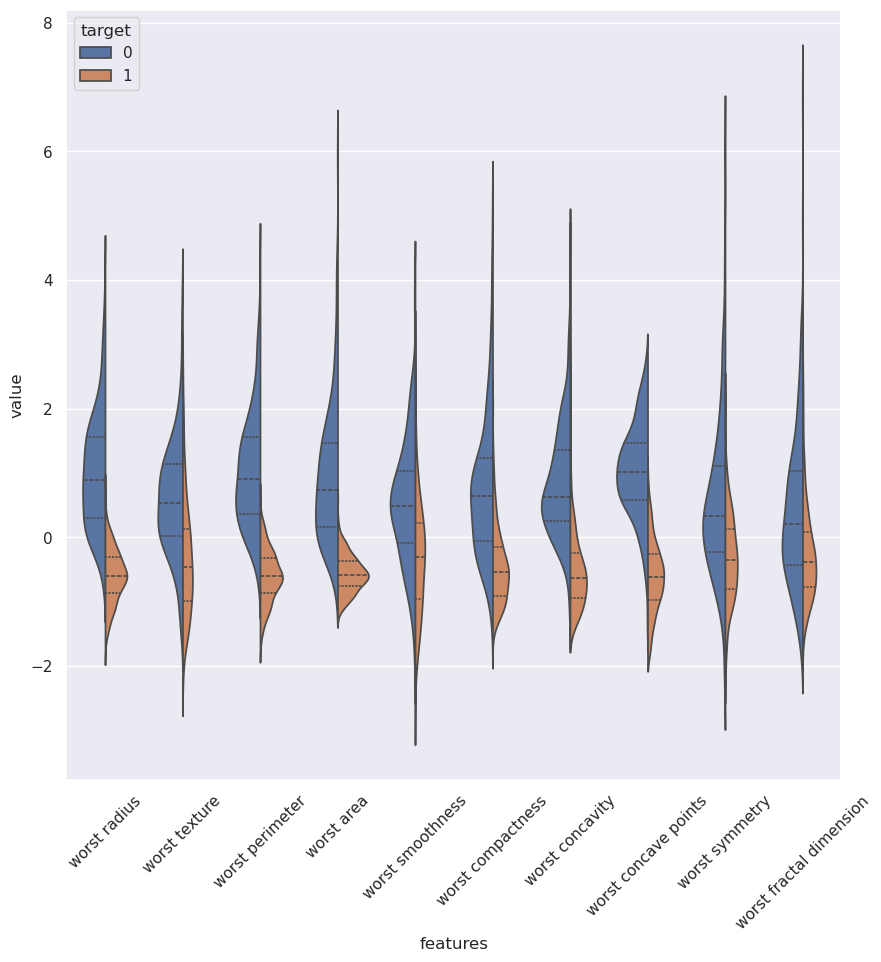

In [8]:
violin_plot(20,31)

En el gráfico anterior, notamos algunas similitudes entre el wort radius y el worst perimeter. Si dos violines se parecen, podría indicar una correlación entre las características, y si dos características están correlacionadas, uno puede preguntarse si es posible (o no) eliminar una.

<Axes: xlabel='worst radius', ylabel='worst perimeter'>

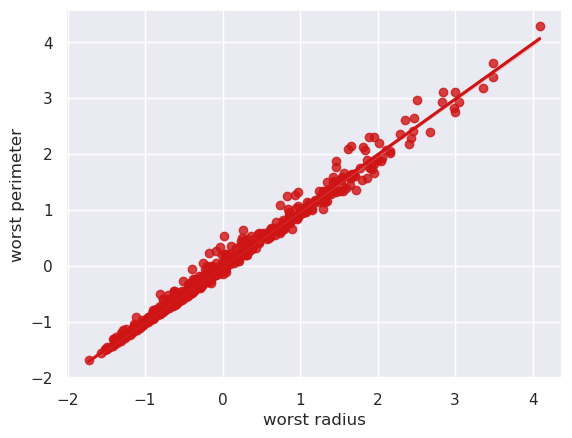

In [9]:
sns.regplot(data = x_scaled, x = "worst radius", y="worst perimeter", color="#ce1414")

<Axes: >

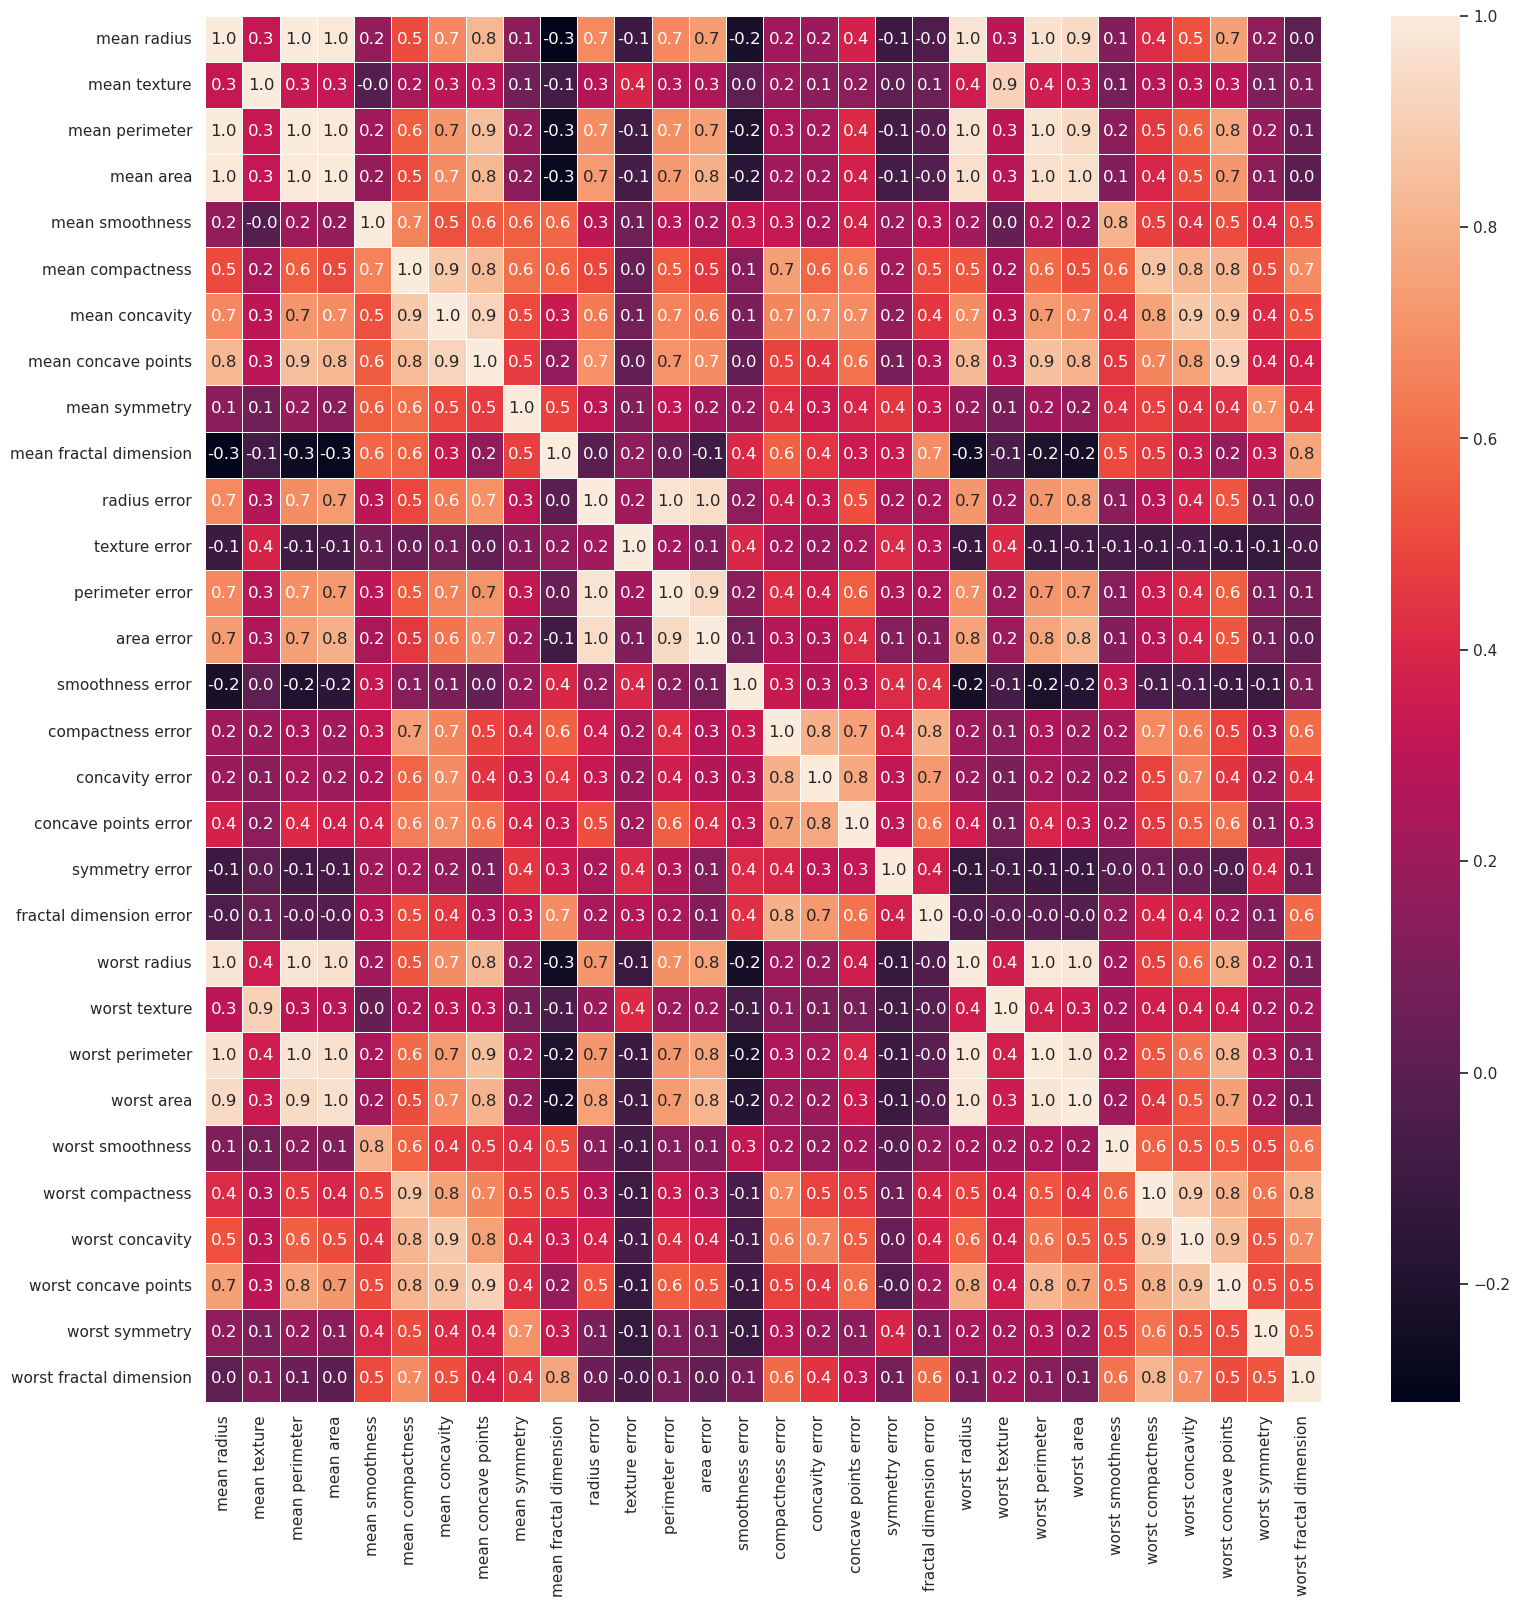

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

 Con este análisis me atrevería a sugerir remover las siguientes variables:
 
 - mean radius
 - mean perimeter
   
 - mean compactness
 - mean concave points

- radius error
- perimeter error

- worst radius
- worst perimeter

- compactness error
- concave points error

- mean compactness
- mean concave points

- worst textrue

- worst area

**NOTA:** no lo voy a hacer por lo pronto, porque podría remover alguna variable que es estadísticamente significativa para el target (tumor maligno o benigno), así que primero aplicaré un método de filtrado y luego removeré las variables que están muy correlacionadas

# <font color= #2E9AFE> Métodos de Filtrado (si contamos con muchas variables)</font>

Si estamos comenzando con la evaluación del dataset. Podríamos iniciar con métodos de filtrado para tomar en cuenta qué variables podríamos remover ya que tenemos muchas variables en nuestros datos.


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

# ANOVA
selector = SelectKBest(score_func=f_classif, k='all')
f_vals, p_vals = f_classif(x_scaled, y)
significant = np.where(p_vals < 0.05)[0]
print("Variables significantes:", X.columns[significant].tolist())

Variables significantes: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [12]:
# seleccionamos aquellas variables que son significativas
df_reduced = df_scaled[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension','target']]

<Axes: >

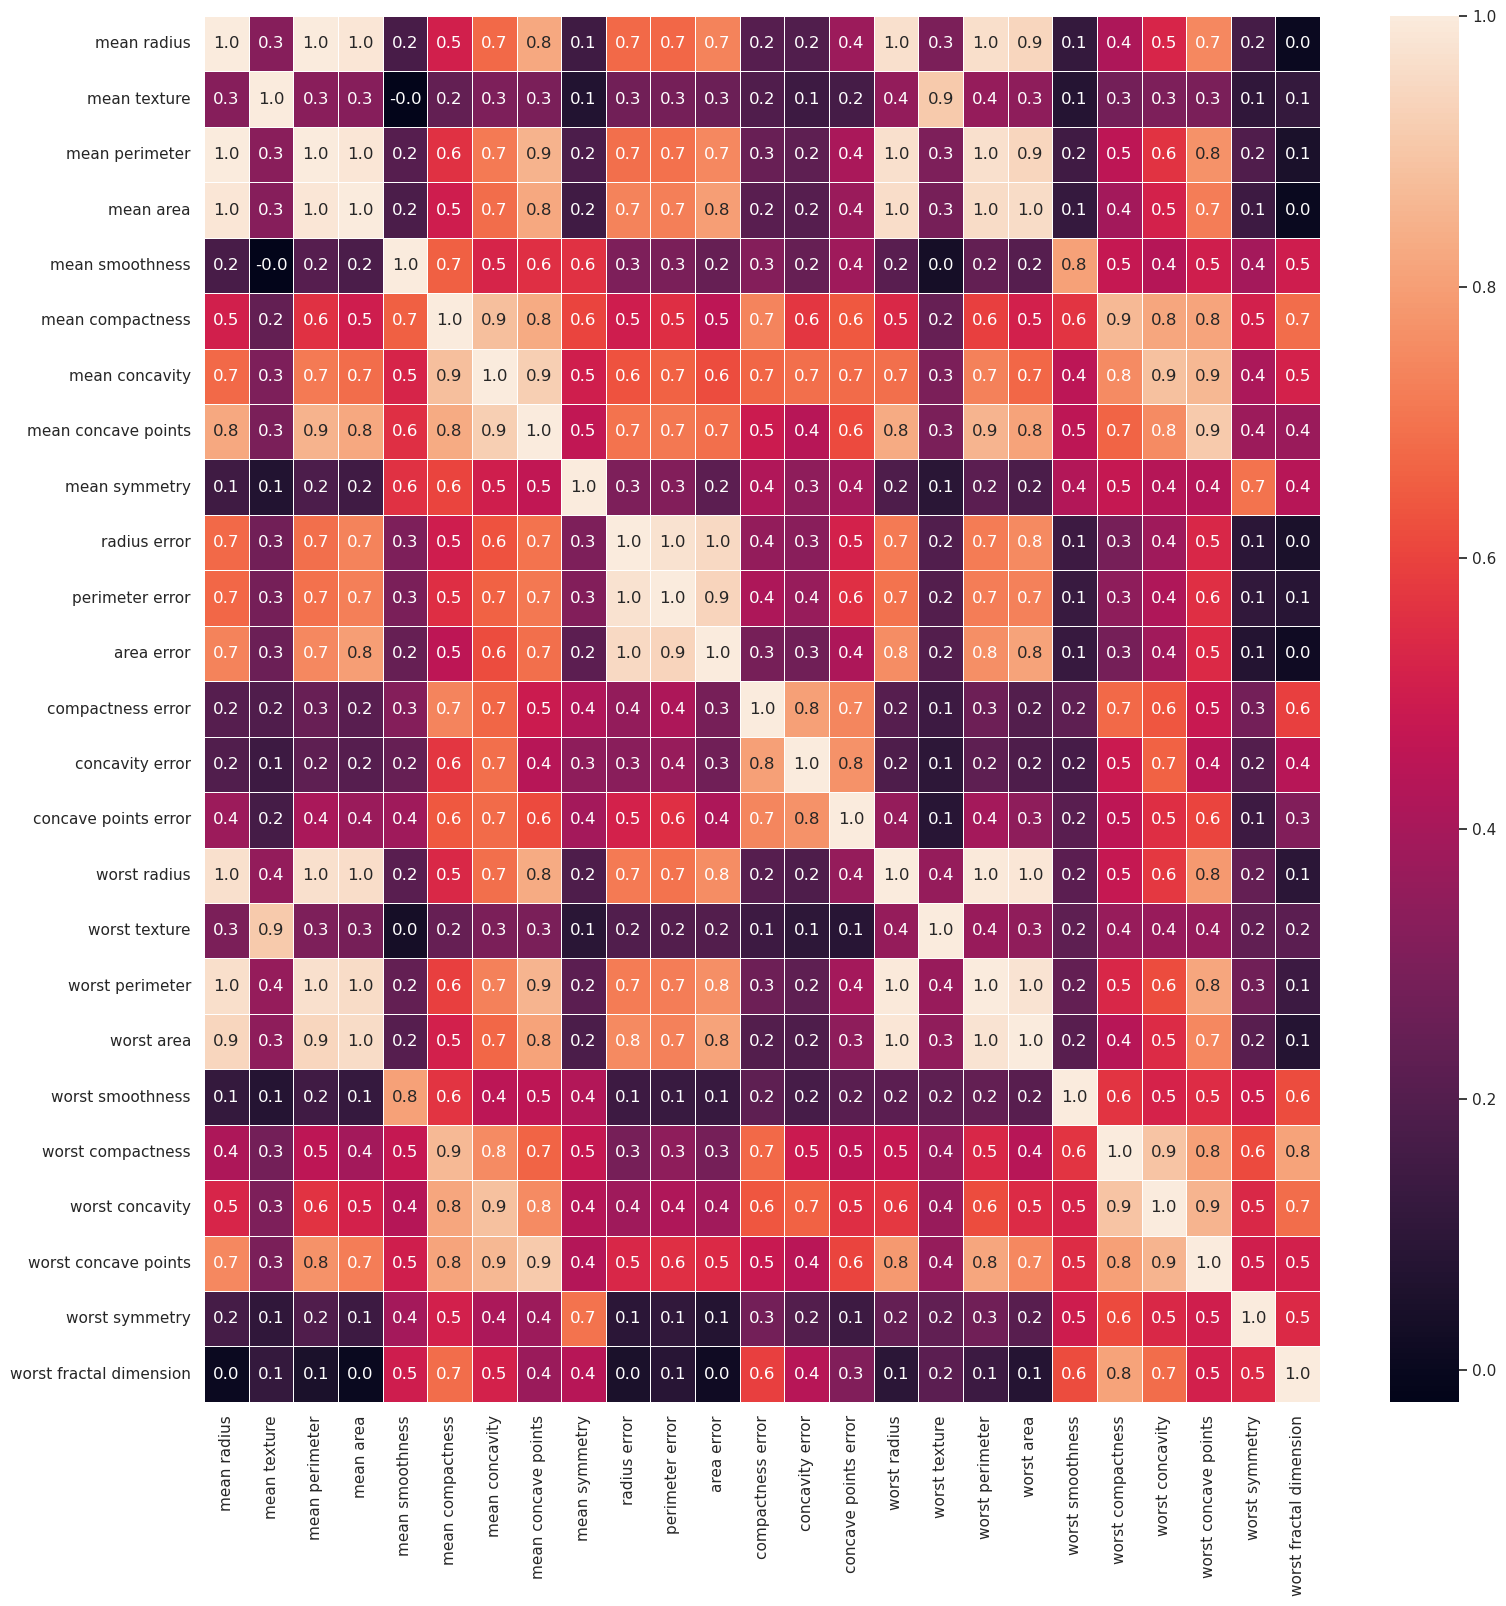

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_reduced.drop(columns='target').corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Opcional**

Observo que quedaron todavía variables muy correlacionadas, por lo tanto ahora sí quitaré las variables correlacionadas que vimos anteriormente

In [14]:
drop_list = ['mean perimeter','mean radius','mean compactness','mean concave points','radius error','perimeter error',
             'worst radius','worst perimeter','worst compactness','worst concave points',
             'compactness error','concave points error','worst texture','worst area']
df_reduced = df_reduced.drop(drop_list,axis = 1 )
df_reduced.shape

(569, 12)

In [27]:
df_reduced

,mean texture,mean area,mean smoothness,mean concavity,mean symmetry,area error,concavity error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension,target
0,-2.071512,0.983510,1.567087,2.650542,2.215566,2.485391,0.723390,1.306537,2.107672,2.748204,1.935312,0
1,-0.353322,1.907030,-0.826235,-0.023825,0.001391,0.741749,-0.440393,-0.375282,-0.146620,-0.243675,0.280943,0
2,0.455786,1.557513,0.941382,1.362280,0.938859,1.180298,0.212889,0.526944,0.854222,1.151242,0.201214,0
3,0.253509,-0.763792,3.280667,1.914213,2.864862,-0.288125,0.818798,3.391291,1.987839,6.040726,4.930672,0
4,-1.150804,1.824624,0.280125,1.369806,-0.009552,1.189310,0.827742,0.220362,0.612640,-0.867590,-0.396751,0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.720838,2.341795,1.040926,1.945573,-0.312314,2.601897,0.665416,0.378033,0.663928,-1.358963,-0.708467,0
565,2.083301,1.722326,0.102368,0.692434,-0.217473,1.290429,0.251980,-0.690623,0.236365,-0.531387,-0.973122,0
566,2.043775,0.577445,-0.839745,0.046547,-0.808406,0.180539,0.510377,-0.808876,0.326479,-1.103578,-0.318129,0
567,2.334403,1.733693,1.524426,3.294046,2.135315,1.008615,1.301140,1.429169,3.194794,1.917396,2.217684,0


<Axes: >

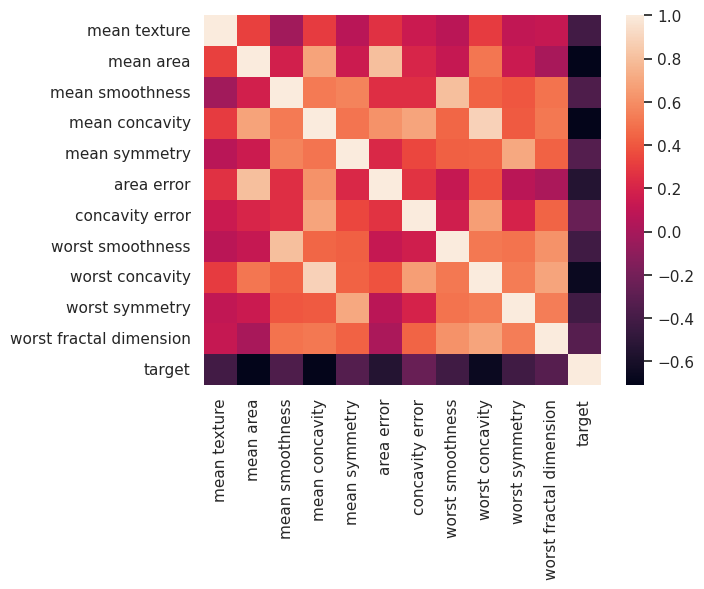

In [28]:
sns.heatmap(df_reduced.corr())

El siguiente paso sería aplicar una selección de variables dirigida al modelo. 

Podemos usar

- Wrapper methods: si tenemos modeos como regresión logística, regresión lineal o máquinas de vector soporte
- Métodos embebidos: si vamos a utilizar algún modelo en específico que ya tenga dentro del modelo un método de selección de variables


# <font color= #2E9AFE> Métodos de Envoltura (Wrapper)</font>

### Eliminación Recursiva de Características (RFE)

Funciona eliminando atributos de forma recursiva y construyendo un modelo sobre los atributos que quedan.

Usa la precisión del modelo para identificar qué atributos (y combinación de atributos) contribuyen más a predecir el objetivo.

Vamos a utilizar la regresión logística para seleccionar las características principales. 

**Por lo general se usa dentro del cross-validation o en pipelines para evitar el overfitting** 

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

selector = RFECV(LogisticRegression(max_iter = 10000), cv=5)

X = df_reduced.drop(columns="target")
y = df_reduced['target']
selector.fit(X,y)
X_selected = X.loc[:, selector.support_]

In [16]:
X_selected

,mean texture,mean area,mean concavity,area error,concavity error,worst smoothness,worst concavity,worst symmetry
0,-2.071512,0.983510,2.650542,2.485391,0.723390,1.306537,2.107672,2.748204
1,-0.353322,1.907030,-0.023825,0.741749,-0.440393,-0.375282,-0.146620,-0.243675
2,0.455786,1.557513,1.362280,1.180298,0.212889,0.526944,0.854222,1.151242
3,0.253509,-0.763792,1.914213,-0.288125,0.818798,3.391291,1.987839,6.040726
4,-1.150804,1.824624,1.369806,1.189310,0.827742,0.220362,0.612640,-0.867590
...,...,...,...,...,...,...,...,...
564,0.720838,2.341795,1.945573,2.601897,0.665416,0.378033,0.663928,-1.358963
565,2.083301,1.722326,0.692434,1.290429,0.251980,-0.690623,0.236365,-0.531387
566,2.043775,0.577445,0.046547,0.180539,0.510377,-0.808876,0.326479,-1.103578
567,2.334403,1.733693,3.294046,1.008615,1.301140,1.429169,3.194794,1.917396


# <font color= #2E9AFE> Métodos embebidos (intrínsecos)</font>

Existen algunos modelos (vamos a irlos viendo) que dentro de su construcción ya hacen una selección de variables. Uno de ellos son los modelos basados en árboles como el "Random Forest". 

Construimos un Clasificador de "Random Forest"

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

#creamos el modelo del random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Vamos a quedarnos con las variables que tengan una importancia arriba del promedio
sfm = SelectFromModel(rf, threshold='median')
sfm.fit(X, y)
X_embedded = X.loc[:, sfm.get_support()]
print("Variables seleccionadas metodo embebido dentro del random forest:", X_embedded.columns.tolist())

Variables seleccionadas metodo embebido dentro del random forest: ['mean texture', 'mean area', 'mean concavity', 'area error', 'concavity error', 'worst concavity']


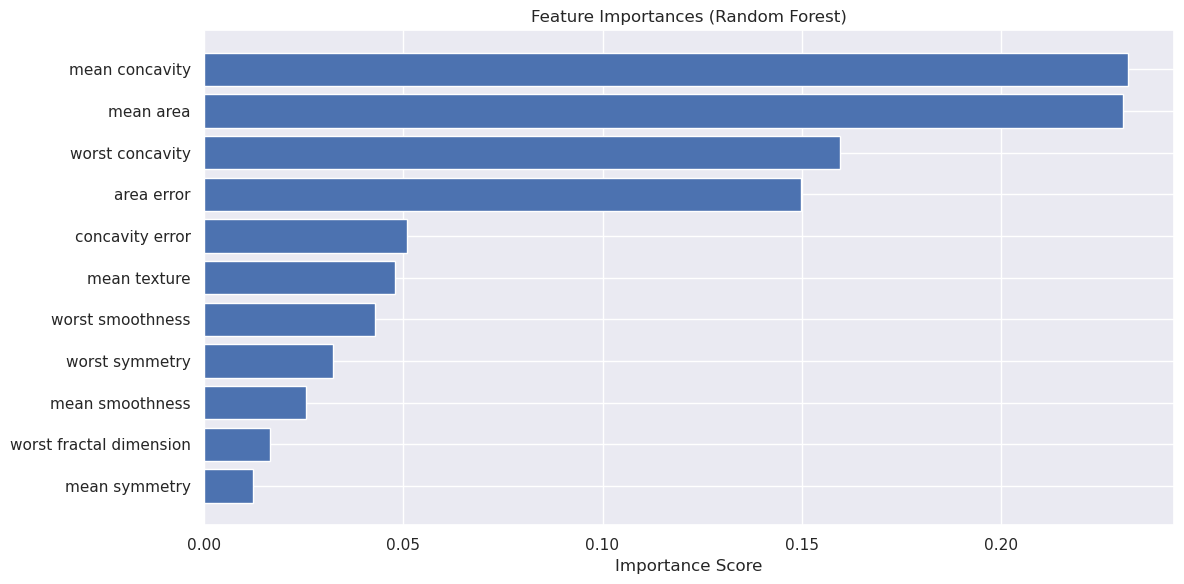

In [18]:
#Visualizamos la importancia de las variables
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(12, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Comparando el performance de los modelos utilizando los distintos métodos

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

def evaluate_model(X_subset, y, model):
    scores = cross_val_score(model, X_subset, y, cv=5, scoring='accuracy')
    return scores.mean()

print("Método de filtrado:", evaluate_model(df_reduced.drop(columns="target"), y, LogisticRegression(max_iter=10000)))
print("Método Wrapper (RFECV):", evaluate_model(X_selected, y, LogisticRegression(max_iter=10000)))
print("Método embebido (Random Forest):", evaluate_model(X_embedded, y, RandomForestClassifier(random_state=42)))


Método de filtrado: 0.9736531594472908
Método Wrapper (RFECV): 0.9789163173420278
Método embebido (Random Forest): 0.9455674584691819


In [20]:
# cuantas variables eligió cada método
print("Metodo filtrado:", df_reduced.drop(columns="target").shape[1])
print("Metodo wrapper:", X_selected.shape[1])
print("Metodo embebido:", X_embedded.shape[1])


Metodo filtrado: 11
Metodo wrapper: 8
Metodo embebido: 6


### ¿Cuál es el mejor método?

...no hay...

Se tiene que hacer experimentación para ver qué método funciona mejor para el problema en específico. 

## Conclusion

La cantidad ideal de variables NO siempre es la menor: hay que observar el rendimiento del modelo, la interpretabilidad y las necesidades del negocio.

### Referencias:

- https://www.stratascratch.com/blog/feature-selection-techniques-in-machine-learning/
- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py
- https://scikit-learn.org/stable/modules/feature_selection.html


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Sara E. Rodríguez.
</footer>